# CVM

Some example code to show how to use the CVM library.

If you want to play with the code, please make a copy

In [6]:
%matplotlib inline

from cvm.cascade import CascadeSVM, DynamicCascadeSVM
from cvm.svm import L1SVM, ElasticSVM
from cvm.data import spiral_data, linear_data, circle_data
from cvm.kernel import rbf_kernel, poly_kernel
from cvm.plot import plot_2d_model

In [7]:
from sklearn import svm

# Data generation

In [8]:
## set parameters

# samples in training and test set
n = 2000
n_test = 5000

# noise level
sigma = 0.3

# paramter for nuSVM
nu = 0.5
# paramter for Gaussian kernel
gamma = 0.05

# data generator
data_generator = spiral_data

## generate data
train = data_generator(n, sigma)
test = data_generator(n_test, sigma)

# Grab the numpy arrays
X = train[['x1', 'x2']].values
y = train['y'].values
X_test = test[['x1', 'x2']].values
y_test = test['y'].values

# Models

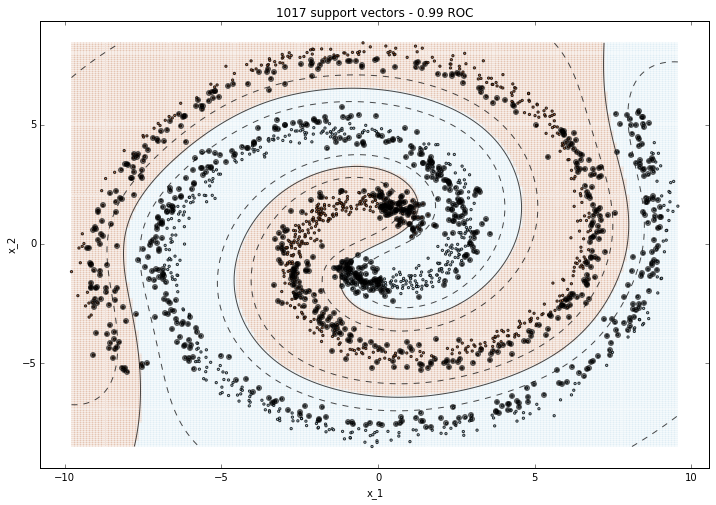

In [9]:
nu = 0.5
gamma = 0.1

svm_model = svm.NuSVC(nu, gamma=gamma)
plot_2d_model(svm_model, X, y, X_test=X_test, y_test=y_test)

split: 1 	 n = 2000
split: 2 	 n = 1000
split: 3 	 n = 500
split: 4 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 167 observations at level 3
split: 7 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 160 observations at level 3
fitting svm with 204 observations at level 2
split: 10 	 n = 500
split: 11 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 162 observations at level 3
split: 14 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 161 observations at level 3
fitting svm with 217 observations at level 2
fitting svm with 281 observations at level 1
split: 17 	 n = 1000
split: 18 	 n = 500
split: 19 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 

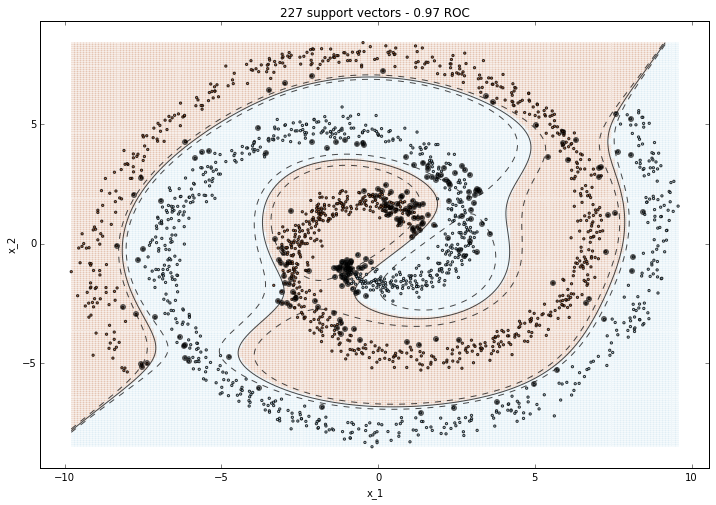

In [10]:
nu = 0.5
gamma = 0.01

base_model = lambda : svm.NuSVC(nu, gamma=gamma)
cascade_model = CascadeSVM(base_model, nx=250)

plot_2d_model(cascade_model, X, y, X_test=X_test, y_test=y_test)

split: 1 	 n = 2000
split: 2 	 n = 1000
split: 3 	 n = 500
split: 4 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 33 observations at level 3
split: 7 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 43 observations at level 3
fitting svm with 25 observations at level 2
split: 10 	 n = 500
split: 11 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 43 observations at level 3
split: 14 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 34 observations at level 3
fitting svm with 45 observations at level 2
fitting svm with 37 observations at level 1
split: 17 	 n = 1000
split: 18 	 n = 500
split: 19 	 n = 250
fitting svm with 125 observations at level 4
fitting svm with 125 observations at level 4
fitting svm with 30 obse

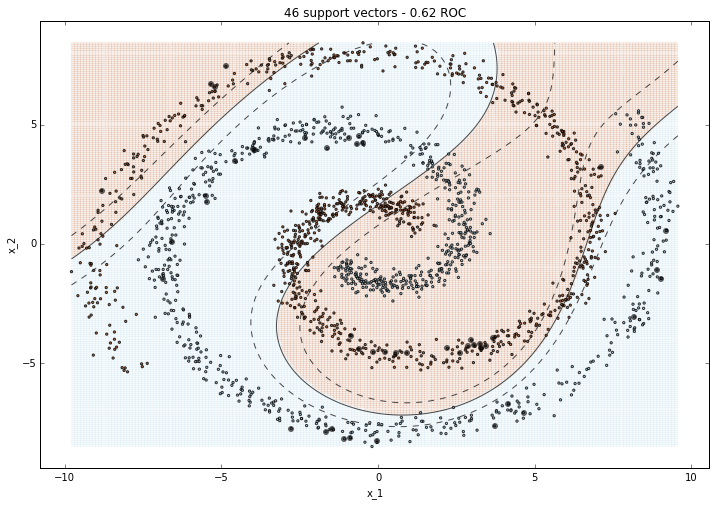

In [11]:
nu = 0.5
gamma = 0.01
reg = 0.001
alpha = 0.5

kernel = lambda X, Y: rbf_kernel(X, Y, gamma=gamma)
# kernel = lambda X, Y: poly_kernel(X, Y, degree=2)

base_model = lambda : ElasticSVM(kernel, reg=reg)
cascade_model = DynamicCascadeSVM(base_model, nx=250, n_iter=3)

plot_2d_model(cascade_model, X, y, X_test=X_test, y_test=y_test)